In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
X = pd.read_csv('intent_metrics.csv')
X = X.drop(columns=['Unnamed: 0'])

y = pd.read_csv('discount_labels.csv')
y = y.drop(columns=['Unnamed: 0'])

X = X.iloc[:,0:13]
y

,discount%
0,30
1,25
2,17
3,10
4,5
...,...
2751,22
2752,24
2753,28
2754,13


In [3]:
# encoding categorical data e.g. gender as a dummy variable
intent_map = { 0: np.NaN,
               1:'intro',
               2:'inform',
               3:'init-price', 
               4:'counter-price', 
               5:'agree', 
               6:'inquiry', 
               7:'disagree', 
               8:'insist',
               9:'accept',
               10:'quit',
             }
             
for v in intent_map:
    X = X.replace(to_replace=intent_map[v], value=v)

In [4]:
def categorizeDiscounts(x):
    if len(x) == 2:
        if x[-1] >= '1' and x[-1] <= '5':
            return int(x[0] + '0')
        elif x[-1] >= '0':
            return int(x[0] + '5')
    else:
        if x > '5':
            return 10
        else:
            return 5

y['discount_labels'] = y['discount%'].apply(lambda x: categorizeDiscounts(str(x)))
y

,discount%,discount_labels
0,30,35
1,25,20
2,17,15
3,10,15
4,5,5
...,...,...
2751,22,20
2752,24,20
2753,28,25
2754,13,10


/Users/kabirbatra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kabirbatra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


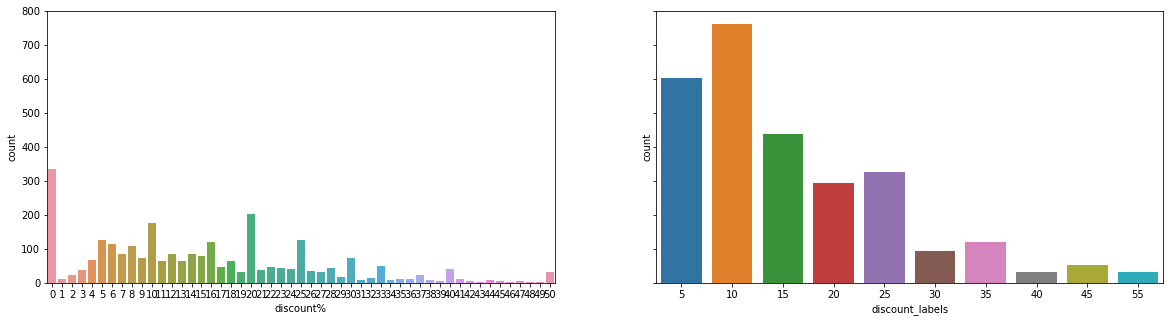

In [5]:
fig, ax =  plt.subplots(1, 2, figsize = (20,5), sharey=True)

sns.countplot(y['discount%'], ax=ax[0])
sns.countplot(y['discount_labels'], ax=ax[1])

plt.show()
# plt.figure(figsize=(8,6))
# sns.countplot(x='discount_labels', data=y)

# plt.figure(figsize=(8,6))
# sns.countplot(x='discount%', data=y)

In [6]:
#training classification model and saving it using pickle in pp_model.pkl
# classifier = DecisionTreeClassifier(criterion='entropy',max_depth=30, random_state=42)
# classifier.fit(X, y['discount_labels'])

# with open('model.pkl', 'wb') as files:
#     pickle.dump(classifier, files)

In [7]:
#loading previously trained model if any
MODEL_FILE_NAME = 'pp_model.pkl'

if os.path.exists(MODEL_FILE_NAME):
    with open(MODEL_FILE_NAME , 'rb') as f:
        classifier = pickle.load(f)
else:
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=30, random_state=42)
    classifier.fit(X, y['discount_labels'])

    with open(MODEL_FILE_NAME , 'wb') as files:
        pickle.dump(classifier, files)

In [8]:
y_pred = classifier.predict(X)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y['discount_labels'], y_pred)
accuracy

0.47750362844702465

In [10]:
classifier.predict([[1,2,7,7,4,4,7,4,7,7,4,0,0]])

array([25])